In [1]:
import pandas as pd
from htsprophet.hts import hts, orderHier, makeWeekly
from htsprophet.htsPlot import plotNode, plotChild, plotNodeComponents
import numpy as np

In [2]:
#%% Random data (Change this to whatever data you want)
date = pd.date_range("2015-04-02", "2017-07-17")
date = np.repeat(date, 10)
medium = ["Air", "Land", "Sea"]
businessMarket = ["Birmingham","Auburn","Evanston"]
platform = ["Stone Tablet","Car Phone"]
mediumDat = np.random.choice(medium, len(date))
busDat = np.random.choice(businessMarket, len(date))
platDat = np.random.choice(platform, len(date))
sessions = np.random.randint(1000,10000,size=(len(date),1))
data = pd.DataFrame(date, columns = ["day"])
data["medium"] = mediumDat
data["platform"] = platDat
data["businessMarket"] = busDat
data["sessions"] = sessions

In [3]:
data.head()

,day,medium,platform,businessMarket,sessions
0,2015-04-02,Land,Car Phone,Evanston,2547
1,2015-04-02,Land,Stone Tablet,Birmingham,9716
2,2015-04-02,Air,Stone Tablet,Birmingham,1994
3,2015-04-02,Sea,Stone Tablet,Evanston,6916
4,2015-04-02,Sea,Car Phone,Auburn,4477


In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8380 entries, 0 to 8379
Data columns (total 5 columns):
day               8380 non-null datetime64[ns]
medium            8380 non-null object
platform          8380 non-null object
businessMarket    8380 non-null object
sessions          8380 non-null int32
dtypes: datetime64[ns](1), int32(1), object(3)
memory usage: 294.7+ KB


In [4]:
# Make the daily data weekly (optional)
##
data1 = makeWeekly(data)
##


In [5]:
# Put the data in the format to run HTS, and get the nodes input (a list of list that describes the hierarchical structure)
##
data2, nodes = orderHier(data1, 1, 2, 3)
##
# load in prophet inputs (Running HTS runs prophet, so all inputs should be gathered beforehand)


In [27]:
data2.keys()

Index(['time', 'Total', 'Air', 'Land', 'Sea', 'Air_Car Phone',
       'Air_Stone Tablet', 'Land_Car Phone', 'Land_Stone Tablet',
       'Sea_Car Phone', 'Sea_Stone Tablet', 'Air_Car Phone_Auburn',
       'Air_Car Phone_Birmingham', 'Air_Car Phone_Evanston',
       'Air_Stone Tablet_Auburn', 'Air_Stone Tablet_Birmingham',
       'Air_Stone Tablet_Evanston', 'Land_Car Phone_Auburn',
       'Land_Car Phone_Birmingham', 'Land_Car Phone_Evanston',
       'Land_Stone Tablet_Auburn', 'Land_Stone Tablet_Birmingham',
       'Land_Stone Tablet_Evanston', 'Sea_Car Phone_Auburn',
       'Sea_Car Phone_Birmingham', 'Sea_Car Phone_Evanston',
       'Sea_Stone Tablet_Auburn', 'Sea_Stone Tablet_Birmingham',
       'Sea_Stone Tablet_Evanston'],
      dtype='object')

In [7]:
# Made up holiday data
##
holidates = pd.date_range("12/25/2013","12/31/2017", freq = 'A')
holidays = pd.DataFrame(["Christmas"]*5, columns = ["holiday"])
holidays["ds"] = holidates
holidays["lower_window"] = [-4]*5
holidays["upper_window"] = [0]*5
##

In [8]:
holidays.head()

,holiday,ds,lower_window,upper_window
0,Christmas,2013-12-31,-4,0
1,Christmas,2014-12-31,-4,0
2,Christmas,2015-12-31,-4,0
3,Christmas,2016-12-31,-4,0
4,Christmas,2017-12-31,-4,0


C:\Users\KryvalapavaP\AppData\Local\Continuum\anaconda3\lib\site-packages\pystan\misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


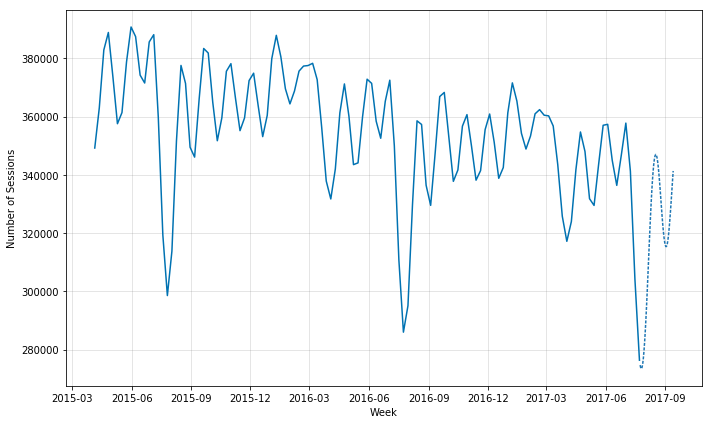

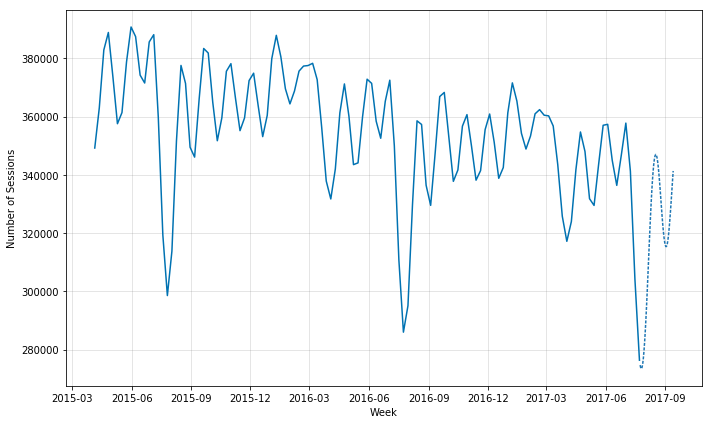

In [20]:
import logging
logger = logging.getLogger()
logger.setLevel(logging.CRITICAL)

# Run hts with the CVselect function (this decides which hierarchical aggregation method to use based on minimum mean Mean Absolute Scaled Error)
# h (which is 12 here) - how many steps ahead you would like to forecast.  If youre using daily data you don't have to specify freq.
#
# NOTE: CVselect takes a while, so if you want results in minutes instead of half-hours pick a different method
##
myDict = hts_m(data2, 52, nodes,  method = "BU", transform = "BoxCox")
##
# This output is a dictionary of dataframes, so you can do any further analysis that you may want. It also allows you to plot the forecasts.
# Some functions I've made are: (1 means I'm plotting the total node)
##
plotNode(myDict, "Total", h = 52, xlabel = "Week", ylabel = "Number of Sessions")
#plotChild(myDict, "Total", h = 52, xlabel = "Week", ylabel = "Number of Sessions")
#plotNodeComponents(myDict, column = "Total", holidays = holidays)

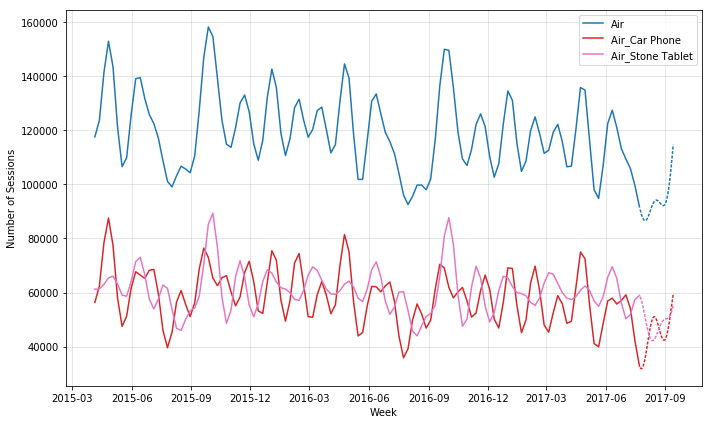

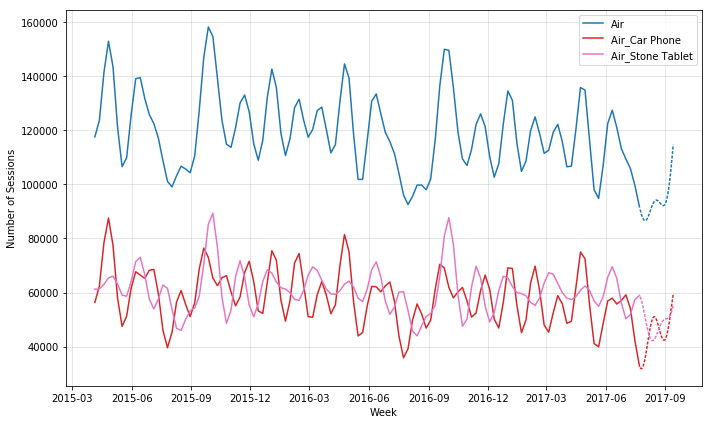

In [21]:
#plotNode(myDict, "Air", h = 52, xlabel = "Week",  ylabel = "Number of Sessions")
plotChild(myDict, "Air", h = 52, xlabel = "Week", ylabel = "Number of Sessions")
#plotNodeComponents(myDict, column = "Air", holidays = holidays)

In [22]:
myDict

{'Total':             ds          trend    yhat_lower    yhat_upper   trend_lower  \
 0   2015-04-05  388951.420763  1.060244e+25  1.060244e+25  1.091891e+25   
 1   2015-04-12  388877.075285  1.430692e+25  1.430692e+25  1.090932e+25   
 2   2015-04-19  388802.678637  1.253460e+25  1.253460e+25  1.089973e+25   
 3   2015-04-26  388728.230738  1.505156e+25  1.505156e+25  1.089013e+25   
 4   2015-05-03  388653.731507  6.937589e+24  6.937589e+24  1.088054e+25   
 5   2015-05-10  388579.180861  3.855308e+24  3.855308e+24  1.087095e+25   
 6   2015-05-17  388504.578721  1.490883e+25  1.490883e+25  1.086136e+25   
 7   2015-05-24  388429.925008  1.627495e+25  1.627495e+25  1.085176e+25   
 8   2015-05-31  388355.219639  1.148420e+25  1.148420e+25  1.084217e+25   
 9   2015-06-07  388280.462523  1.403476e+25  1.403476e+25  1.083258e+25   
 10  2015-06-14  388205.653589  1.328359e+25  1.328359e+25  1.082299e+25   
 11  2015-06-21  388130.792754  8.205788e+24  8.205788e+24  1.081339e+25   
 12

In [24]:
data2

,time,Total,Air,Land,Sea,Air_Car Phone,Air_Stone Tablet,Land_Car Phone,Land_Stone Tablet,Sea_Car Phone,...,Land_Car Phone_Evanston,Land_Stone Tablet_Auburn,Land_Stone Tablet_Birmingham,Land_Stone Tablet_Evanston,Sea_Car Phone_Auburn,Sea_Car Phone_Birmingham,Sea_Car Phone_Evanston,Sea_Stone Tablet_Auburn,Sea_Stone Tablet_Birmingham,Sea_Stone Tablet_Evanston
0,2015-04-05,231343,56706,87025,87612,26836,29870,42062.0,44963,43593,...,26786.0,9007.0,35956.0,1.0,19973.0,14659.0,8961.0,17565.0,14321.0,12133.0
1,2015-04-12,415147,137745,134145,143257,89562,48183,58587.0,75558,97707,...,24656.0,33456.0,12234.0,29868.0,7883.0,52650.0,37174.0,24788.0,15233.0,5529.0
2,2015-04-19,423811,161243,123527,139041,63375,97868,78440.0,45087,65283,...,28702.0,9250.0,27669.0,8168.0,28581.0,26096.0,10606.0,17405.0,37341.0,19012.0
3,2015-04-26,383858,205331,95519,83008,118580,86751,33933.0,61586,45433,...,17646.0,1.0,26171.0,35415.0,32812.0,5386.0,7235.0,18781.0,18794.0,1.0
4,2015-05-03,375260,149458,115638,110164,102290,47168,71060.0,44578,49217,...,14370.0,4496.0,25207.0,14875.0,7578.0,18764.0,22875.0,8765.0,20658.0,31524.0
5,2015-05-10,393268,122370,106347,164551,54599,67771,78060.0,28287,90466,...,49259.0,8386.0,1250.0,18651.0,11796.0,9802.0,68868.0,24873.0,27150.0,22062.0
6,2015-05-17,322129,116821,98434,106874,55793,61028,24174.0,74260,52017,...,16446.0,20845.0,41394.0,12021.0,16466.0,14563.0,20988.0,10390.0,14107.0,30360.0
7,2015-05-24,384081,137715,123696,122670,52719,84996,64780.0,58916,56376,...,19436.0,18140.0,23268.0,17508.0,15440.0,13108.0,27828.0,19424.0,34830.0,12040.0
8,2015-05-31,365016,120304,146505,98207,53500,66804,64607.0,81898,39808,...,9514.0,29877.0,32973.0,19048.0,13031.0,19645.0,7132.0,34255.0,9818.0,14326.0
9,2015-06-07,396281,140469,145887,109925,72309,68160,76430.0,69457,54295,...,37171.0,33839.0,18159.0,17459.0,11884.0,18803.0,23608.0,27731.0,10101.0,17798.0


In [28]:
nodes

[[3], [2, 2, 2], [3, 3, 3, 3, 3, 3]]

In [29]:
def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [ ]:
def quality_check(dict_act, dict_forecast):
    errors_dict={}
    

In [9]:
import sys
from sklearn.model_selection import TimeSeriesSplit
from scipy.stats import boxcox
from scipy.special import inv_boxcox
from multiprocessing.dummy import Pool as ThreadPool
from fbprophet import Prophet
import contextlib, os
from scipy.special import inv_boxcox


#%%
def hts_m(y, h = 1, nodes = [[2]], method='OLS', freq = 'D', transform = None, include_history = True, cap = None, capF = None, changepoints = None, \
        n_changepoints = 25, yearly_seasonality = 'auto', weekly_seasonality = 'auto', holidays = None, seasonality_prior_scale = 10.0, \
        holidays_prior_scale = 10.0, changepoint_prior_scale = 0.05, mcmc_samples = 0, interval_width = 0.80, uncertainty_samples = 0, skipFitting = False, numThreads = 0):
    '''
    Parameters
    ----------------
     y - dataframe of time-series data, or if you want to skip fitting, a dictionary of prophet base forecast dataframes
               Layout:
                   0th Col - Time instances
                   1st Col - Total of TS
                   2nd Col - One of the children of the Total TS
                   3rd Col - The other child of the Total TS
                   ...
                   ... Rest of the 1st layer
                   ...
                   Xth Col - First Child of the 2nd Col
                   ...
                   ... All of the 2nd Col's Children
                   ...
                   X+Yth Col - First Child of the 3rd Col
                   ...
                   ..
                   .   And so on...
    
     h - number of step ahead forecasts to make (int)
    
     nodes - a list or list of lists of the number of child nodes at each level
     Ex. if the hierarchy is one total with two child nodes that comprise it, the nodes input would be [2]
     
     method - String  the type of hierarchical forecasting method that the user wants to use. 
                Options:
                "OLS" - optimal combination by Original Least Squares (Default), 
                "WLSS" - optimal combination by Structurally Weighted Least Squares
                "WLSV" - optimal combination by Error Variance Weighted Least Squares
                "FP" - forcasted proportions (top-down)
                "PHA" - proportions of historical averages (top-down)
                "AHP" - average historical proportions (top-down)
                "BU" - bottom-up (simple addition)
                "CVselect" - select which method is best for you based on 3-fold Cross validation (longer run time)
     
     freq - (Time Frequency) input for the forecasting function of Prophet 
     
     transform - (None or "BoxCox") Do you want to transform your data before fitting the prophet function? If yes, type "BoxCox"
     
     include_history - (Boolean) input for the forecasting function of Prophet
                
     cap - (Dataframe or Constant) carrying capacity of the input time series.  If it is a dataframe, then
                                   the number of columns must equal len(y.columns) - 1
                                   
     capF - (Dataframe or Constant) carrying capacity of the future time series.  If it is a dataframe, then
                                    the number of columns must equal len(y.columns) - 1
     
     changepoints - (DataFrame or List) changepoints for the model to consider fitting. If it is a dataframe, then
                                        the number of columns must equal len(y.columns) - 1
     
     n_changepoints - (constant or list) changepoints for the model to consider fitting. If it is a list, then
                                         the number of items must equal len(y.columns) - 1
                                         
     skipFitting - (Boolean) if y is already a dictionary of dataframes, set this to True, and DO NOT run with method = "cvSelect" or transform = "BoxCox"
     
     numThreads - (int) number of threads you want to use when running cvSelect. Note: 14 has shown to decrease runtime by 10 percent 
                                 
     All other inputs - see Prophet
     
    Returns
    -----------------
     ynew - a dictionary of DataFrames with predictions, seasonalities and trends that can all be plotted
    
    '''
    # Function Definitions
    ##
    #  "Creating the summing matrix" funciton
    ##
    def SummingMat(nodes):
        '''
         This function creates a summing matrix for the bottom up and optimal combination approaches
         All the inputs are the same as above
         The output is a summing matrix, see Rob Hyndman's "Forecasting: principles and practice" Section 9.4
        '''
        numAtLev = list(map(sum, nodes))
        numLevs = len(numAtLev)
        top = np.ones(numAtLev[-1])       #Create top row, which is just all ones
        blMat = np.identity(numAtLev[-1]) #Create Identity Matrix for Bottom level Nodes
        finalMat = blMat
        ##
        # These two loops build the matrix from bottom to top 
        ##
        for lev in range(numLevs-1):
            summing = nodes[-(lev + 1)]
            count = 0
            a = 0
            num2sumInd = 0
            B = np.zeros([numAtLev[-1]])
            for num2sum in summing:
                num2sumInd += num2sum
                a = blMat[count:num2sumInd, :]
                count += num2sum
                if np.all(B == 0):
                    B = a.sum(axis = 0)
                else:
                    B = np.vstack((B, a.sum(axis = 0)))
            finalMat = np.vstack((B, finalMat))
            blMat = B
        ##
        # Append the Top array to the Matrix and then return it
        ##
        finalMat = np.vstack((top, finalMat))
        return finalMat
    ##
    # Error Handling
    ##        
    if h < 1:
        sys.exit('you must set h (number of step-ahead forecasts) to a positive number')
    if method not in ['OLS','WLSS','WLSV','FP','PHA','AHP','BU','cvSelect']:
        sys.exit("not a valid method input, must be one of the following: 'OLS','WLSS','WLSV','FP','PHA','AHP','BU','cvSelect'")
    if len(nodes) < 1:
        sys.exit("nodes input should at least be of length 1")
    if not isinstance(cap, int) and not isinstance(cap, pd.DataFrame) and not isinstance(cap, float) and not cap is None:
        sys.exit("cap should be a constant (float or int) or a DataFrame, or not specified")
    if not isinstance(capF, int) and not isinstance(capF, pd.DataFrame) and not isinstance(capF, float) and not capF is None:
        sys.exit("capF should be a constant (float or int) or a DataFrame, or not specified")
    if not isinstance(y, dict):
        if sum(list(map(sum, nodes))) != len(y.columns)-2:
            sys.exit("The sum of the nodes list does not equal the number of columns - 2, dataframe should contain a time column in the 0th pos. Double check node input")
        if isinstance(cap, pd.DataFrame):
            if len(cap.columns) != len(y.columns)-1:
                sys.exit("If cap is a DataFrame, it should have a number of columns equal to the input Dataframe - 1")
        if isinstance(capF, pd.DataFrame):
            if len(capF.columns) != len(y.columns)-1:
                sys.exit("If capF is a DataFrame, it should have a number of columns equal to the input Dataframe - 1")
    if cap is not None and method not in ["BU","FP","AHP","PHA"]:
        print("Consider using BU, FP, AHP, or PHA.  The other methods can create negatives which would cause problems for the log() function")
    ##
    # Transform Variables
    ##
    if transform is not None:
        if transform == 'BoxCox':
            y2 = y.copy()
            import warnings
            warnings.simplefilter("error", RuntimeWarning)
            boxcoxT = [None]*(len(y.columns.tolist())-1)
            try:
                for column in range(len(y.columns.tolist())-1):
                    y2.iloc[:,column+1], boxcoxT[column] = boxcox(y2.iloc[:, column+1])
                y = y2
            ##
            # Does a Natural Log Transform if scipy's boxcox cant deal
            ##
            except RuntimeWarning:
                print("It looks like scipy's boxcox function couldn't deal with your data. Proceeding with Natural Log Transform")
                for column in range(len(y.columns.tolist())-1):
                    y.iloc[:,column+1] = boxcox(y.iloc[:, column+1], lmbda = 0)
                    boxcoxT[column] = 0
        else:
            print("Nothing will be transformed because the input was not = to 'BoxCox'")
    else:
        boxcoxT = None
    ##
    # Run specified approach
    ##
    if method == 'cvSelect':
        ##
        # Run all of the Methods and let 3 fold CV chose which is best for you
        ##
        methodList = ['WLSV','WLSS','OLS','FP','PHA','AHP','BU']
        sumMat = SummingMat(nodes)
        tscv = TimeSeriesSplit(n_splits=3)
        MASE1 = []
        MASE2 = []
        MASE3 = []
        MASE4 = []
        MASE5 = []
        MASE6 = []
        MASE7 = []
        ##
        # Split into train and test, using time series split, and predict the test set
        ##
        y1 = y.copy()
        if boxcoxT is not None:
                for column in range(len(y.columns.tolist())-1):
                    y1.iloc[:,column+1] = inv_boxcox(y1.iloc[:, column+1], boxcoxT[column])
                    
        for trainIndex, testIndex in tscv.split(y.iloc[:,0]):
            if numThreads != 0:
                pool = ThreadPool(numThreads)
                results = pool.starmap(fitForecast, zip([y.iloc[trainIndex, :]]*7, [len(testIndex)]*7, [sumMat]*7, [nodes]*7, methodList, [freq]*7, [include_history]*7, [cap]*7, [capF]*7, [changepoints]*7, [n_changepoints]*7, \
                                    [yearly_seasonality]*7, [weekly_seasonality]*7, [holidays]*7, [seasonality_prior_scale]*7, [holidays_prior_scale]*7,\
                                    [changepoint_prior_scale]*7, [mcmc_samples]*7, [interval_width]*7, [uncertainty_samples]*7,  [boxcoxT]*7, [skipFitting]*7))
                pool.close()
                pool.join()
                ynew1, ynew2, ynew3, ynew4, ynew5, ynew6, ynew7 = results
            else:
                ynew1 = fitForecast(y.iloc[trainIndex, :], len(testIndex), sumMat, nodes, methodList[0], freq, include_history, cap, capF, changepoints, n_changepoints, \
                                    yearly_seasonality, weekly_seasonality, holidays, seasonality_prior_scale, holidays_prior_scale,\
                                    changepoint_prior_scale, mcmc_samples, interval_width, uncertainty_samples, boxcoxT, skipFitting)
                ynew2 = fitForecast(y.iloc[trainIndex, :], len(testIndex), sumMat, nodes, methodList[1], freq, include_history, cap, capF, changepoints, n_changepoints, \
                                    yearly_seasonality, weekly_seasonality, holidays, seasonality_prior_scale, holidays_prior_scale,\
                                    changepoint_prior_scale, mcmc_samples, interval_width, uncertainty_samples, boxcoxT, skipFitting)
                ynew3 = fitForecast(y.iloc[trainIndex, :], len(testIndex), sumMat, nodes, methodList[2], freq, include_history, cap, capF, changepoints, n_changepoints, \
                                    yearly_seasonality, weekly_seasonality, holidays, seasonality_prior_scale, holidays_prior_scale,\
                                    changepoint_prior_scale, mcmc_samples, interval_width, uncertainty_samples, boxcoxT, skipFitting)
                ynew4 = fitForecast(y.iloc[trainIndex, :], len(testIndex), sumMat, nodes, methodList[3], freq, include_history, cap, capF, changepoints, n_changepoints, \
                                    yearly_seasonality, weekly_seasonality, holidays, seasonality_prior_scale, holidays_prior_scale,\
                                    changepoint_prior_scale, mcmc_samples, interval_width, uncertainty_samples, boxcoxT, skipFitting)
                ynew5 = fitForecast(y.iloc[trainIndex, :], len(testIndex), sumMat, nodes, methodList[4], freq, include_history, cap, capF, changepoints, n_changepoints, \
                                    yearly_seasonality, weekly_seasonality, holidays, seasonality_prior_scale, holidays_prior_scale,\
                                    changepoint_prior_scale, mcmc_samples, interval_width, uncertainty_samples, boxcoxT, skipFitting)
                ynew6 = fitForecast(y.iloc[trainIndex, :], len(testIndex), sumMat, nodes, methodList[5], freq, include_history, cap, capF, changepoints, n_changepoints, \
                                    yearly_seasonality, weekly_seasonality, holidays, seasonality_prior_scale, holidays_prior_scale,\
                                    changepoint_prior_scale, mcmc_samples, interval_width, uncertainty_samples, boxcoxT, skipFitting)
                ynew7 = fitForecast(y.iloc[trainIndex, :], len(testIndex), sumMat, nodes, methodList[6], freq, include_history, cap, capF, changepoints, n_changepoints, \
                                    yearly_seasonality, weekly_seasonality, holidays, seasonality_prior_scale, holidays_prior_scale,\
                                    changepoint_prior_scale, mcmc_samples, interval_width, uncertainty_samples, boxcoxT, skipFitting)
#                    
            for key in ynew1.keys():
                MASE1.append(np.mean(abs(ynew1[key].yhat[-len(testIndex):].values - y1.iloc[testIndex, key+1].values)))
                MASE2.append(np.mean(abs(ynew2[key].yhat[-len(testIndex):].values - y1.iloc[testIndex, key+1].values)))
                MASE3.append(np.mean(abs(ynew3[key].yhat[-len(testIndex):].values - y1.iloc[testIndex, key+1].values)))
                MASE4.append(np.mean(abs(ynew4[key].yhat[-len(testIndex):].values - y1.iloc[testIndex, key+1].values)))
                MASE5.append(np.mean(abs(ynew5[key].yhat[-len(testIndex):].values - y1.iloc[testIndex, key+1].values)))
                MASE6.append(np.mean(abs(ynew6[key].yhat[-len(testIndex):].values - y1.iloc[testIndex, key+1].values)))
                MASE7.append(np.mean(abs(ynew7[key].yhat[-len(testIndex):].values - y1.iloc[testIndex, key+1].values)))
        ##
        # If the method has the minimum Average MASE, use it on all of the data
        ##
        choices = [np.mean(MASE1), np.mean(MASE2), np.mean(MASE3), np.mean(MASE4), np.mean(MASE5), np.mean(MASE6), np.mean(MASE7)]
        choice = methodList[choices.index(min(choices))]
        ynew = fitForecast(y, h, sumMat, nodes, choice, freq, transform, include_history, cap, capF, changepoints, n_changepoints, \
                           yearly_seasonality, weekly_seasonality, holidays, seasonality_prior_scale, holidays_prior_scale,\
                           changepoint_prior_scale, mcmc_samples, interval_width, uncertainty_samples, boxcoxT, skipFitting)
        print(choice)
    
    else:    
        if skipFitting == True:
            theDictionary = y
            i = 0
            for key in y.keys():
                if i == 0:
                    y = pd.DataFrame(theDictionary[key].ds)
                y[i] = theDictionary[key].yhat
                i += 1
        sumMat = SummingMat(nodes)
        ynew = fitForecast(y, h, sumMat, nodes, method, freq, transform, include_history, cap, capF, changepoints, n_changepoints, \
                           yearly_seasonality, weekly_seasonality, holidays, seasonality_prior_scale, holidays_prior_scale,\
                           changepoint_prior_scale, mcmc_samples, interval_width, uncertainty_samples, boxcoxT, skipFitting)
    ##
    # Inverse boxcox the data
    ##    
    if transform is not None:
        if transform == 'BoxCox':
            for column in range(len(y.columns.tolist())-1):
                y.iloc[:,column+1] = inv_boxcox(y.iloc[:, column+1], boxcoxT[column])
    ##
    # Put the values back in the dictionary for skipFitting
    ##
    if skipFitting == True:
        i = 0
        for key in theDictionary.keys():
            for column in theDictionary[key].columns:
                if column == 'yhat':
                    continue
                ynew[key][column] = theDictionary[key][column]
    ##
    # Rename keys so that dictionary can be easily understood
    ##

    i = -2
    for column in y:
        i += 1   
        if i == -1:
            continue
        else:
            ynew[column] = ynew.pop(i)
    
    return ynew


In [10]:
def fitForecast(y, h, sumMat, nodes, method, freq, transform, include_history, cap, capF, changepoints, n_changepoints, \
                yearly_seasonality, weekly_seasonality, holidays, seasonality_prior_scale, holidays_prior_scale,\
                changepoint_prior_scale, mcmc_samples, interval_width, uncertainty_samples, boxcoxT, skipFitting):
   
    forecastsDict = {}
    mse = {}
    resids = {}
    nForecasts = sumMat.shape[0]
    ##
    # If you have a ditionary of Prophet Dataframes already, skip the prophet part, and put all the values into a dictionary
    ##
    if skipFitting == True:
        for key in range(len(y.columns.tolist())-1):
            forecastsDict[key] = pd.DataFrame(y.iloc[:,key+1])
            forecastsDict[key] = forecastsDict[key].rename(columns = {forecastsDict[key].columns[0] : 'yhat'})
            
    if skipFitting == False:
        
        if method == 'FP':
            nForecasts = sum(list(map(sum, nodes)))+1
        
        for node in range(nForecasts):
            nodeToForecast = pd.concat([y.iloc[:, [0]], y.iloc[:, node+1]], axis = 1)
            if isinstance(cap, pd.DataFrame):
                cap1 = cap.iloc[:, node]
            else:
                cap1 = cap
            if isinstance(capF, pd.DataFrame):    
                cap2 = capF.iloc[:, node]
            else:
                cap2 = capF
            if isinstance(changepoints, pd.DataFrame):
                changepoints1 = changepoints[:, node]
            else:
                changepoints1 = changepoints
            if isinstance(n_changepoints, list):
                n_changepoints1 = n_changepoints[node]
            else:
                n_changepoints1 = n_changepoints
            ##
            # Put the forecasts into a dictionary of dataframes
            ##
            with contextlib.redirect_stdout(open(os.devnull, "w")):
                # Prophet related stuff
                nodeToForecast = nodeToForecast.rename(columns = {nodeToForecast.columns[0] : 'ds'})
                nodeToForecast = nodeToForecast.rename(columns = {nodeToForecast.columns[1] : 'y'})
                if capF is None:
                    growth = 'linear'
					

                    m = Prophet(growth, changepoints=changepoints1, n_changepoints=n_changepoints1, yearly_seasonality=yearly_seasonality, weekly_seasonality=weekly_seasonality, holidays=holidays, seasonality_prior_scale=seasonality_prior_scale, \
                                holidays_prior_scale=holidays_prior_scale, changepoint_prior_scale=changepoint_prior_scale, mcmc_samples=mcmc_samples, interval_width=interval_width, uncertainty_samples=uncertainty_samples)
                else:
                    growth = 'logistic'
                    m = Prophet(growth, changepoints, n_changepoints, yearly_seasonality, weekly_seasonality, holidays, seasonality_prior_scale, \
                                holidays_prior_scale, changepoint_prior_scale, mcmc_samples, interval_width, uncertainty_samples)
                    nodeToForecast['cap'] = cap1
                m.fit(nodeToForecast)
                future = m.make_future_dataframe(periods = h, freq = freq, include_history = include_history)
                if capF is not None:
                    future['cap'] = cap2
                ##
                # Base Forecasts, Residuals, and MSE
                ##
                forecastsDict[node] = m.predict(future)
                resids[node] = y.iloc[:, node+1] - forecastsDict[node].yhat[:-h].values
                mse[node] = np.mean(np.array(resids[node])**2)
                ##
                # If logistic use exponential function, so that values can be added correctly
                ##
                if capF is not None:
                    forecastsDict[node].yhat = np.exp(forecastsDict[node].yhat)
                if boxcoxT is not None:
                    forecastsDict[node].yhat = inv_boxcox(forecastsDict[node].yhat, boxcoxT[node])
                    forecastsDict[node].trend = inv_boxcox(forecastsDict[node].trend, boxcoxT[node])
                    if "seasonal" in forecastsDict[node].columns.tolist():
                        forecastsDict[node].seasonal = inv_boxcox(forecastsDict[node].seasonal, boxcoxT[node])
                    if "weekly" in forecastsDict[node].columns.tolist():
                        forecastsDict[node].weekly = inv_boxcox(forecastsDict[node].weekly, boxcoxT[node])
                    if "yearly" in forecastsDict[node].columns.tolist():
                        forecastsDict[node].yearly = inv_boxcox(forecastsDict[node].yearly, boxcoxT[node])
                    if "holidays" in forecastsDict[node].columns.tolist():
                        forecastsDict[node].yearly = inv_boxcox(forecastsDict[node].yearly, boxcoxT[node])
    ##
    # Now, Revise them
    ##
    if method == 'BU' or method == 'AHP' or method == 'PHA':
        y1 = y.copy()
        nCols = len(list(forecastsDict.keys()))+1
        if method == 'BU':
            '''
             Pros:
               No information lost due to aggregation
             Cons:
               Bottom level data can be noisy and more challenging to model and forecast
            '''
            hatMat = np.zeros([len(forecastsDict[0].yhat),1]) 
            for key in range(nCols-sumMat.shape[1]-1, nCols-1):
                f1 = np.array(forecastsDict[key].yhat)
                f2 = f1[:, np.newaxis]
                if np.all(hatMat == 0):
                    hatMat = f2
                else:
                    hatMat = np.concatenate((hatMat, f2), axis = 1)
            
        if method == 'AHP':
            '''
             Pros:
               Creates reliable aggregate forecasts, and good for low count data
             Cons:
               Unable to capture individual series dynamics
            '''
            if boxcoxT is not None:
                for column in range(len(y.columns.tolist())-1):
                    y1.iloc[:,column+1] = inv_boxcox(y1.iloc[:, column+1], boxcoxT[column])
            ##
            # Find Proportions
            ##
            fcst = forecastsDict[0].yhat
            fcst = fcst[:, np.newaxis]
            numBTS = sumMat.shape[1]
            btsDat = pd.DataFrame(y1.iloc[:,nCols-numBTS:nCols])
            divs = np.divide(np.transpose(np.array(btsDat)),np.array(y1.iloc[:,1]))
            props = divs.mean(1)
            props = props[:, np.newaxis]
            hatMat = np.dot(np.array(fcst),np.transpose(props))
            
        if method == 'PHA':
            '''
             Pros:
               Creates reliable aggregate forecasts, and good for low count data
             Cons:
               Unable to capture individual series dynamics
            '''
            if boxcoxT is not None:
                for column in range(len(y.columns.tolist())-1):
                    y1.iloc[:,column+1] = inv_boxcox(y1.iloc[:, column+1], boxcoxT[column])
            ##
            # Find Proportions
            ##
            fcst = forecastsDict[0].yhat
            fcst = fcst[:, np.newaxis]
            numBTS = sumMat.shape[1]
            btsDat = pd.DataFrame(y1.iloc[:,nCols-numBTS:nCols])
            btsSum = btsDat.sum(0)
            topSum = sum(y1.iloc[:,1])
            props = btsSum/topSum
            props = props[:, np.newaxis]
            hatMat = np.dot(np.array(fcst),np.transpose(props))
        
        newMat = np.empty([hatMat.shape[0],sumMat.shape[0]])
        for i in range(hatMat.shape[0]):
            newMat[i,:] = np.dot(sumMat, np.transpose(hatMat[i,:]))
            
    if method == 'FP':
        newMat = forecastProp(forecastsDict, nodes)
    if method == 'OLS' or method == 'WLSS' or method == 'WLSV':
        if capF is not None:
            print("An error might occur because of how these methods are defined (They can produce negative values). If it does, then please use another method")
        newMat = optimalComb(forecastsDict, sumMat, method, mse)
    
    for key in forecastsDict.keys():
        values = forecastsDict[key].yhat.values
        values = newMat[:,key]
        forecastsDict[key].yhat = values
        ##
        # If Logistic fit values with natural log function to revert back to format of input
        ##
        if capF is not None:
            forecastsDict[key].yhat = np.log(forecastsDict[key].yhat)
        
    return forecastsDict
    
#%%    
def forecastProp(forecastsDict, nodes):
    '''
     Cons:
       Produces biased revised forecasts even if base forecasts are unbiased
    '''
    nCols = len(list(forecastsDict.keys()))+1
    ##
    # Find proportions of forecast at each step ahead, and then alter forecasts
    ##
    levels = len(nodes)
    column = 0
    firstNode = 1
    newMat = np.empty([len(forecastsDict[0].yhat),nCols - 1])
    newMat[:,0] = forecastsDict[0].yhat
    lst = [x for x in range(nCols-1)]
    for level in range(levels):
        nodesInLevel = len(nodes[level])
        foreSum = 0
        for node in range(nodesInLevel):
            numChild = nodes[level][node]
            lastNode = firstNode + numChild
            lst = [x for x in range(firstNode, lastNode)]
            baseFcst = np.array([forecastsDict[k].yhat[:] for k in lst])
            foreSum = np.sum(baseFcst, axis = 0)
            foreSum = foreSum[:, np.newaxis]
            if column == 0:
                revTop = np.array(forecastsDict[column].yhat)
                revTop = revTop[:, np.newaxis]
            else:
                revTop = np.array(newMat[:,column])
                revTop = revTop[:, np.newaxis]
            newMat[:,firstNode:lastNode] = np.divide(np.multiply(np.transpose(baseFcst), revTop), foreSum)
            column += 1       
            firstNode += numChild    
    
    return newMat

#%%    
def optimalComb(forecastsDict, sumMat, method, mse):

    hatMat = np.zeros([len(forecastsDict[0].yhat),1]) 
    for key in forecastsDict.keys():
        f1 = np.array(forecastsDict[key].yhat)
        f2 = f1[:, np.newaxis]
        if np.all(hatMat == 0):
            hatMat = f2
        else:
            hatMat = np.concatenate((hatMat, f2), axis = 1)
    ##
    # Multiply the Summing Matrix Together S*inv(S'S)*S'
    ##
    if method == "OLS":
        optiMat = np.dot(np.dot(sumMat, np.linalg.inv(np.dot(np.transpose(sumMat), sumMat))),np.transpose(sumMat))
    if method == "WLSS":
        diagMat = np.diag(np.transpose(np.sum(sumMat, axis = 1)))
        optiMat = np.dot(np.dot(np.dot(sumMat, np.linalg.inv(np.dot(np.dot(np.transpose(sumMat), np.linalg.inv(diagMat)), sumMat))), np.transpose(sumMat)), np.linalg.inv(diagMat))
    if method == "WLSV":
        diagMat = [mse[key] for key in mse.keys()]
        diagMat = np.diag(np.flip(np.hstack(diagMat)+0.0000001, 0))
        optiMat = np.dot(np.dot(np.dot(sumMat, np.linalg.inv(np.dot(np.dot(np.transpose(sumMat), np.linalg.inv(diagMat)), sumMat))), np.transpose(sumMat)), np.linalg.inv(diagMat))
        
    newMat = np.empty([hatMat.shape[0],sumMat.shape[0]])
    for i in range(hatMat.shape[0]):
        newMat[i,:] = np.dot(optiMat, np.transpose(hatMat[i,:]))
        
    return newMat